<a href="https://colab.research.google.com/github/palia95/ML_Physics/blob/master/Midterm-Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import all the needed packages
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
import scipy as sp
from sklearn.cluster  import KMeans
from scipy.optimize import minimize

pl.rcParams['font.size'] = 18


#TASK 1.I - read in the data

In [3]:
#read data from GitHub. I can't read it from drive because .xls and .csv are automatically converted into .gsheet  
url = "https://github.com/fedhere/MLPNS2021/raw/main/midterm/country_pop.xls"
country_pop = pd.read_excel(url, skiprows=3, index_col=0)

#remove the unused colums, also 2020 because is empty
country_pop.drop(["Country Code", "Indicator Name", "Indicator Code","2020"], axis=1, inplace=True)

#debug DF print
country_pop

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733

#TASK 1.II - clean the data

In [4]:
#clean the data by removing empty rows
data_clean = country_pop.dropna(axis=0, how='any')

#debug DF print
data_clean

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733

#TASK 1.III - plot the data

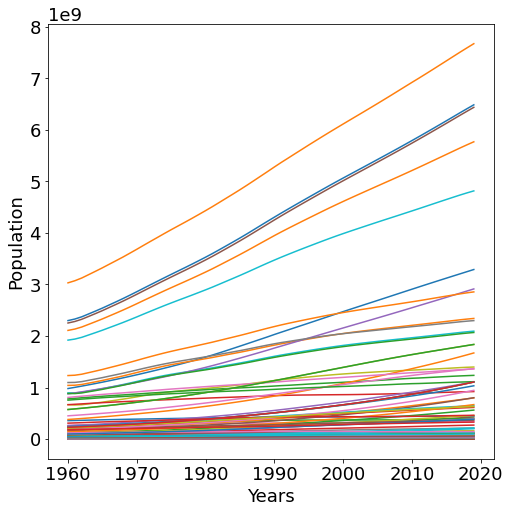

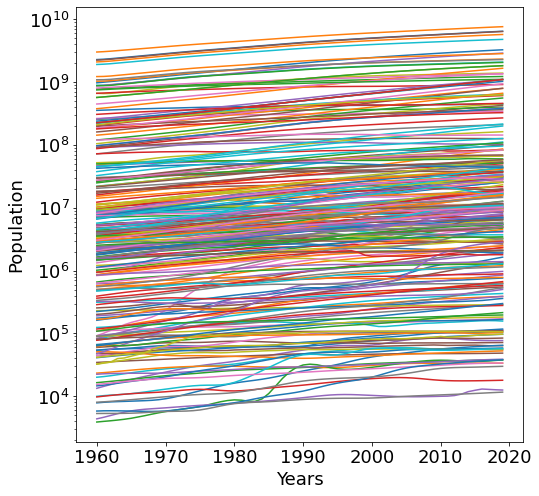

In [5]:
#define X data array
years = np.arange(1960, 2020, 1)

#define figures for plots
dec_plot = pl.figure(figsize = (8, 8)).add_subplot()
log_plot = pl.figure(figsize = (8, 8)).add_subplot()

#plot each country data
for i in range(len(data_clean)):
  dec_plot.plot(years,data_clean.iloc[i])
  log_plot.plot(years,data_clean.iloc[i])

#add X, and Y labels
dec_plot.set_xlabel('Years')
dec_plot.set_ylabel('Population')
log_plot.set_xlabel('Years')
log_plot.set_ylabel('Population')
log_plot.set_yscale('log')

#TASK 1.IV - scale the data

In [6]:
#compute mean population for each country
data_clean.mean(axis=1)

Country Name
Aruba           7.626863e+04
Afghanistan     1.836226e+07
Angola          1.382323e+07
Albania         2.708297e+06
Andorra         5.154735e+04
                    ...     
Kosovo          1.592782e+06
Yemen, Rep.     1.374138e+07
South Africa    3.661848e+07
Zambia          8.614972e+06
Zimbabwe        9.402160e+06
Length: 258, dtype: float64

In [7]:
#compute std population for each country
data_clean.std(axis=1)

Country Name
Aruba           1.926069e+04
Afghanistan     8.708064e+06
Angola          7.811889e+06
Albania         4.801448e+05
Andorra         2.353092e+04
                    ...     
Kosovo          3.086293e+05
Yemen, Rep.     7.526263e+06
South Africa    1.275281e+07
Zambia          4.250322e+06
Zimbabwe        3.360224e+06
Length: 258, dtype: float64

In [8]:
#scale data for country
data_scaled = preprocessing.scale(data_clean.to_numpy(), axis = 1)

#print for debug
data_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([[-1.15487934, -1.09063686, -1.04943163, ...,  1.52346116,
         1.54854033,  1.57309593],
       [-1.08454854, -1.06457944, -1.04349931, ...,  2.07686652,
         2.17831023,  2.27898755],
       [-1.08026563, -1.07038518, -1.06043658, ...,  2.06460812,
         2.19279658,  2.32389203],
       ...,
       [-1.54345287, -1.50986992, -1.4749823 , ...,  1.61172086,
         1.67333445,  1.73490668],
       [-1.31542602, -1.29322947, -1.27037617, ...,  1.9547325 ,
         2.07292067,  2.19373628],
       [-1.68826614, -1.64974604, -1.60948109, ...,  1.45091024,
         1.51161452,  1.57357236]])

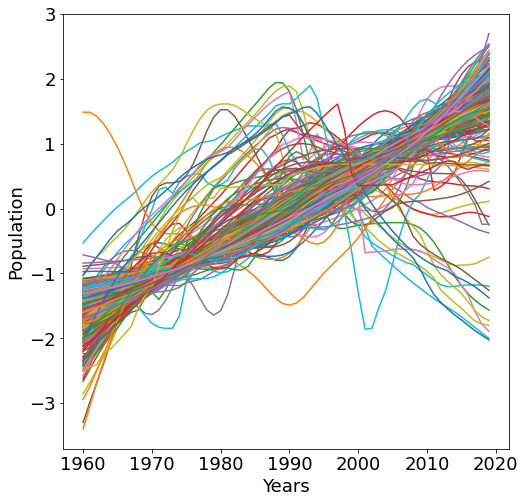

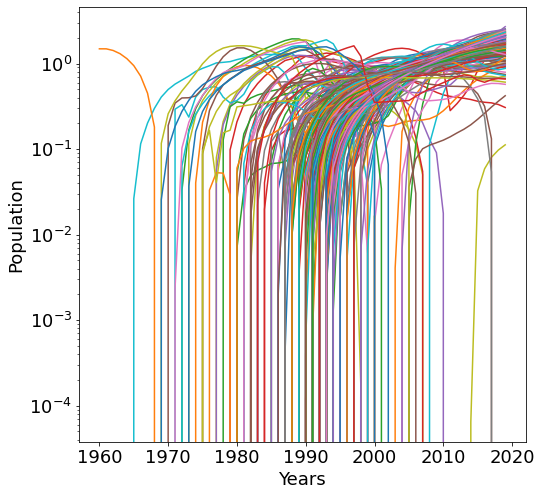

In [9]:
#define figures for new plots
dec_plot_scaled = pl.figure(figsize = (8, 8)).add_subplot()
log_plot_scaled = pl.figure(figsize = (8, 8)).add_subplot()

#plot each country data
for i in range(len(data_scaled)):
  dec_plot_scaled.plot(years,data_scaled[i])
  log_plot_scaled.plot(years,data_scaled[i])

#add X, and Y labels
dec_plot_scaled.set_xlabel('Years')
dec_plot_scaled.set_ylabel('Population')
log_plot_scaled.set_xlabel('Years')
log_plot_scaled.set_ylabel('Population')
log_plot_scaled.set_yscale('log')

#Task 2.I

In [10]:
#define fitting components
def poly(a, b, c, x):
    '''
    define the target polynom equation
    '''
    return a * (x**2) + b * x + c

def l2(args, x, y):
    '''
    define the L2 equation
    '''
    a, b, c = args
    return sum((y - poly(a, b, c, x))**2)

#define X,Y
x = years
y = data_scaled

In [11]:
#debug print
y.shape

(258, 60)

In [12]:
#define initialGuess params and empty array
initialGuess = (1, 1, 1)
params = []

#compute a,b and c for each series
for i in range(len(data_scaled)):
  l2Solution = minimize(l2, initialGuess, args=(x, y[i,:]))
  params.append(l2Solution.x)

features = np.array(params)

#debug print
features.shape

(258, 3)

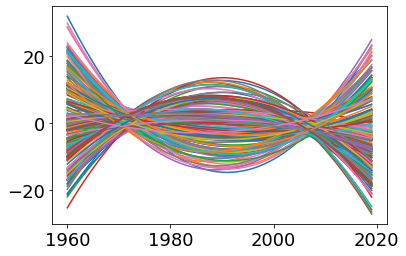

In [13]:
#debug plot
for i in range(len(data_scaled)):
  fit = features[i][0]*x**2 + features[i][1]*x + features[i][2]
  pl.plot(x,fit)

In [14]:
#K-S test for a
sp.stats.kstest(features[:,0], 'norm')

KstestResult(statistic=0.4829234327527485, pvalue=6.712574454104693e-56)

In [15]:
#K-S test for b
sp.stats.kstest(features[:,1], 'norm')

KstestResult(statistic=0.6162790694477812, pvalue=7.578015444734732e-95)

In [16]:
#K-S test for c
sp.stats.kstest(features[:,0], 'norm')

KstestResult(statistic=0.4829234327527485, pvalue=6.712574454104693e-56)

###With P-value set to 0.01, all the test rejects the null hypothesis, thus they are consistent

Text(0.5, 0, 'c')

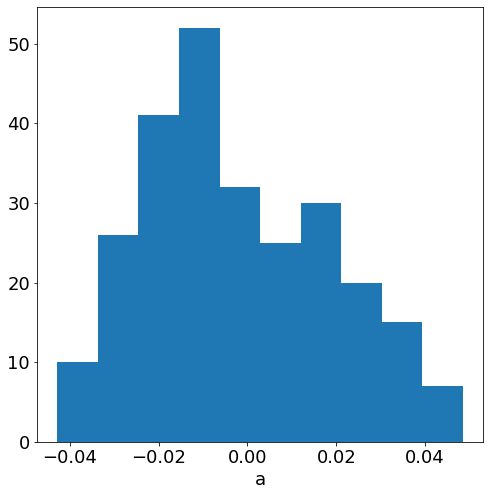

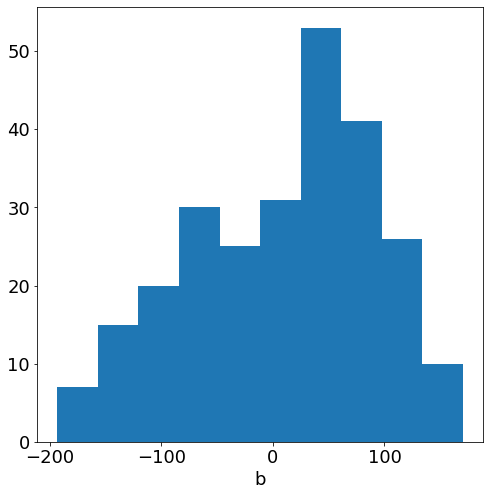

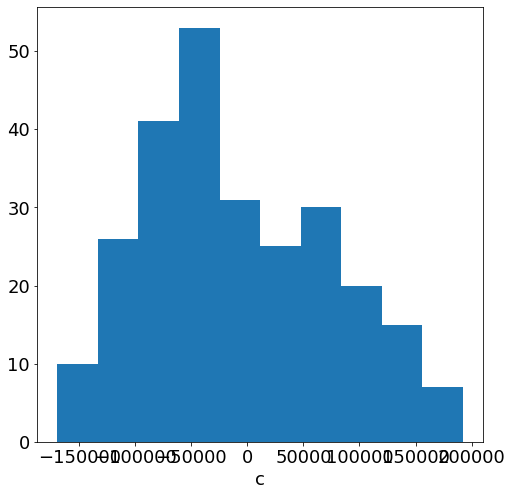

In [17]:
#define figures for new plots
a = pl.figure(figsize = (8, 8)).add_subplot()
b = pl.figure(figsize = (8, 8)).add_subplot()
c = pl.figure(figsize = (8, 8)).add_subplot()

#plot features coefficients into histograms
a.hist(features[:,0])
a.set_xlabel('a')
b.hist(features[:,1])
b.set_xlabel('b')
c.hist(features[:,2])
c.set_xlabel('c')


#TASK 3.I - preprocess the features

In [18]:
#features mean
mean = features.mean(axis=0)

In [19]:
#features std
std = features.std(axis=0)

In [20]:
#features preprocessing
features_scaled = preprocessing.scale(features, axis = 0)

#debug print
features_scaled

array([[-0.23983855,  0.24127163, -0.24270495],
       [-0.36474055,  0.36404041, -0.36333527],
       [-1.67411115,  1.67583214, -1.67755094],
       [ 0.74256048, -0.74345871,  0.74435734],
       [-0.24496347,  0.24429439, -0.24362421],
       [ 0.7722376 , -0.77297932,  0.77372137],
       [ 1.74434382, -1.74510469,  1.74587668],
       [-0.43521982,  0.43671543, -0.438212  ],
       [ 1.81277501, -1.81348115,  1.81417302],
       [ 0.74271782, -0.74309938,  0.74346656],
       [ 2.50414303, -2.50497043,  2.50579687],
       [-0.33697244,  0.33653478, -0.33609535],
       [-1.06039404,  1.05969447, -1.05899321],
       [-0.60707532,  0.60670816, -0.60635439],
       [-0.411132  ,  0.41087219, -0.41062993],
       [-0.17806389,  0.17740092, -0.17673677],
       [ 1.73405198, -1.73297927,  1.73188711],
       [ 0.72352418, -0.72428639,  0.72504901],
       [ 1.62586649, -1.62662824,  1.62739092],
       [ 0.70977888, -0.7117069 ,  0.71363548],
       [ 1.62549946, -1.62348565,  1.621

In [21]:
#features scaled mean
features_scaled.mean(axis=0)

array([-4.40808027e-17,  2.31397319e-17,  1.71186278e-17])

In [22]:
#features scaled std
features_scaled.std(axis=0)

array([1., 1., 1.])

#TASK 3.II - choosing the number of clusters

Variance with 1 clusters: 774.0
Variance with 2 clusters: 206.91177908800896
Variance with 3 clusters: 105.42915750866838
Variance with 4 clusters: 38.56446780836423
Variance with 5 clusters: 23.70542568102899
Variance with 6 clusters: 15.427138693860181
Variance with 7 clusters: 12.353624417755144
Variance with 8 clusters: 9.748318802195252
Variance with 9 clusters: 7.717066736734916
Variance with 10 clusters: 5.960393367536545


Text(0, 0.5, 'Variance')

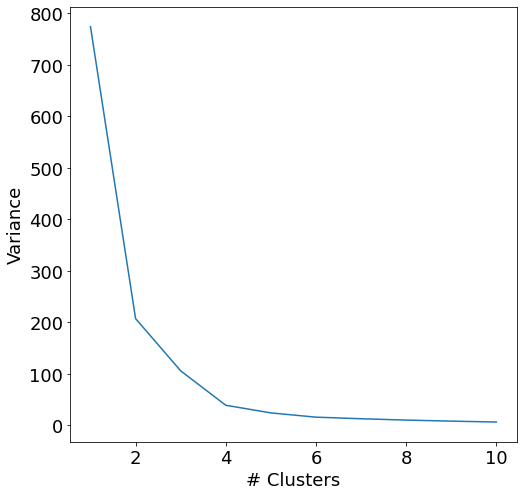

In [23]:
#define clusters
clusters = np.arange(1, 11, 1)

#define graph figure
clusters_plot = pl.figure(figsize = (8,8)).add_subplot()

#create empty array
output = []

#perform Kmeans for different number of clusters and save data into array
for i in range (len(clusters)):
  cluster_data = KMeans(clusters[i], random_state=123).fit(features_scaled)
  print("Variance with {} clusters: {}".format(i+1, cluster_data.inertia_))
  output.append(cluster_data.inertia_)

#plot data  
clusters_plot.plot(clusters, output)
clusters_plot.set_xlabel("# Clusters")
clusters_plot.set_ylabel("Variance")


###4 clusters seems the sweet point ... but it does not seem a true elbow

#TASK 3.III - clustering

In [24]:
#KMeans clustering for 4 clusters
cluster_data = KMeans(4, random_state=123).fit(features_scaled)

#debug print
cluster_data.labels_

array([0, 0, 2, 3, 0, 3, 1, 0, 1, 3, 1, 0, 2, 0, 0, 0, 1, 3, 1, 3, 1, 3,
       2, 2, 2, 0, 2, 0, 1, 0, 3, 1, 1, 3, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       0, 3, 0, 2, 0, 1, 3, 0, 3, 0, 1, 2, 2, 2, 1, 0, 3, 3, 2, 0, 3, 3,
       0, 0, 3, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 3, 2, 3, 0, 3, 3, 3,
       2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 3, 2, 2,
       3, 2, 0, 2, 2, 0, 2, 3, 0, 2, 3, 0, 2, 1, 1, 0, 0, 0, 1, 3, 1, 3,
       0, 0, 0, 2, 3, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 3, 0, 1, 3, 2, 0,
       0, 3, 2, 1, 3, 0, 3, 2, 0, 0, 2, 2, 3, 1, 3, 0, 3, 0, 1, 0, 0, 3,
       1, 0, 3, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 3, 0, 2, 2, 2, 1, 0, 2, 3,
       0, 1, 2, 3, 0, 2, 0, 3, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 3, 0,
       2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 3, 3, 0, 2, 0, 0, 0, 2, 0, 1, 3, 1,
       1, 3, 2, 0, 0, 2, 3, 2, 2, 1, 2, 2, 0, 2, 3, 0], dtype=int32)

In [25]:
#clusters centers
cluster_data.cluster_centers_

array([[-0.24357285,  0.24358054, -0.24358753],
       [ 1.66483515, -1.66484635,  1.66485508],
       [-1.14110031,  1.14108882, -1.14107677],
       [ 0.66536906, -0.66535659,  0.66534417]])

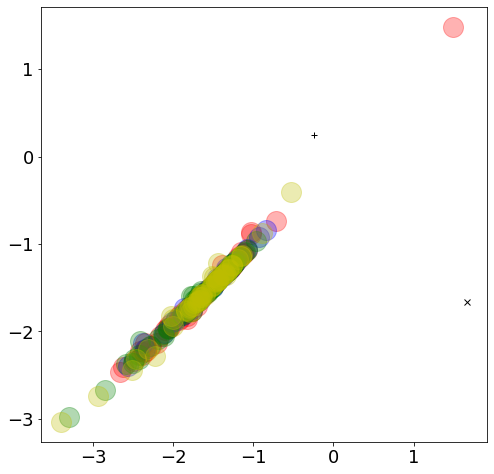

In [30]:
#plot clusters
cluster_centers_plot = pl.figure(figsize = (8, 8)).add_subplot()

cluster_centers_plot.plot(data_scaled[cluster_data.labels_==0][:,0], data_scaled[cluster_data.labels_==0][:,1],'ro',ms=20,alpha=0.3)
cluster_centers_plot.plot(data_scaled[cluster_data.labels_==1][:,0], data_scaled[cluster_data.labels_==1][:,1],'bo',ms=20,alpha=0.3)
cluster_centers_plot.plot(data_scaled[cluster_data.labels_==2][:,0], data_scaled[cluster_data.labels_==2][:,1],'go',ms=20,alpha=0.3)
cluster_centers_plot.plot(data_scaled[cluster_data.labels_==3][:,0], data_scaled[cluster_data.labels_==3][:,1],'yo',ms=20,alpha=0.3)